In [1]:
print("hello")

hello


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [3]:
IMAGE_SIZE = [224, 224]

In [5]:
# train_path = '/content/drive/MyDrive/train'
# valid_path = '/content/drive/MyDrive/test'
data = 'PSL'
# print(train_path)
# print(valid_path)
print(data)

PSL


In [6]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58889256/58889256 [==============================] - 135s 2us/step


In [7]:
for layer in vgg.layers:
  layer.trainable = False

In [9]:
# folders = glob('/content/drive/MyDrive/train/*')
# print(len(folders))
folder = glob('PSL')
print(len(folder))

1


In [10]:
x = Flatten()(vgg.output)

In [11]:
prediction = Dense(len(folders), activation='softmax')(x)


In [12]:
model = Model(inputs=vgg.input, outputs=prediction)

In [13]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [14]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [15]:
from keras.preprocessing.image import ImageDataGenerator


In [16]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [17]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [18]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1034 images belonging to 37 classes.


In [19]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 445 images belonging to 37 classes.


In [20]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

<ipython-input-20-89113a27acbd>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/5
33/33 [==============================] - 632s 19s/step - loss: 2.1874 - accuracy: 0.4990 - val_loss: 0.9930 - val_accuracy: 0.7573
Epoch 2/5
33/33 [==============================] - 611s 19s/step - loss: 0.3413 - accuracy: 0.9149 - val_loss: 0.4815 - val_accuracy: 0.8764
Epoch 3/5
33/33 [==============================] - 607s 19s/step - loss: 0.1501 - accuracy: 0.9700 - val_loss: 0.4125 - val_accuracy: 0.8674
Epoch 4/5
33/33 [==============================] - 609s 19s/step - loss: 0.0835 - accuracy: 0.9826 - val_loss: 0.3293 - val_accuracy: 0.8787
Epoch 5/5
33/33 [==============================] - 605s 18s/step - loss: 0.0689 - accuracy: 0.9874 - val_loss: 0.3172 - val_accuracy: 0.9191


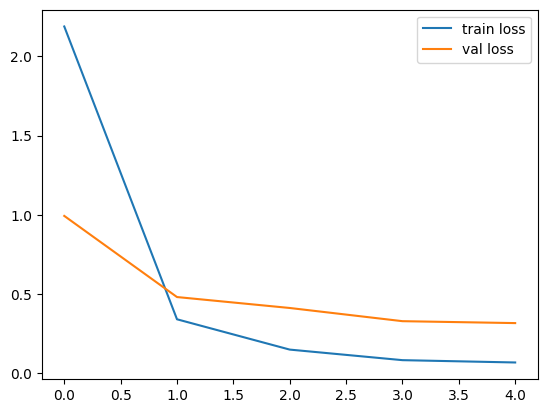

<Figure size 640x480 with 0 Axes>

In [21]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

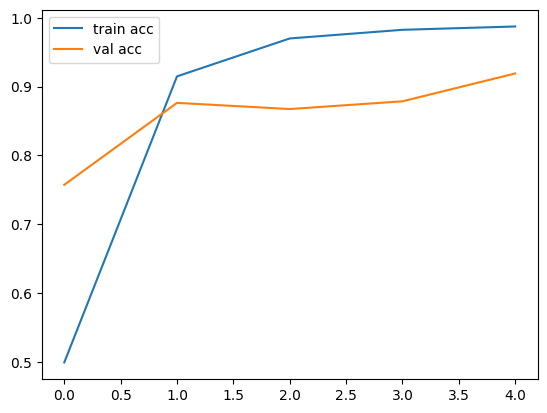

<Figure size 640x480 with 0 Axes>

In [24]:
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [25]:
import tensorflow as tf

from keras.models import load_model

model.save('vgg16_model_transfer_learning.h5')

In [26]:
from tensorflow.keras.preprocessing import image

In [28]:
img_path = '/content/drive/MyDrive/test/Chay چ/H_30.png'
